# Early Diabetes Classification
Sulthan Abiyyu | 10 December 2021 \
Dataset source : https://www.kaggle.com/andrewmvd/early-diabetes-classification

In [141]:
import pandas as pd

data = pd.read_csv('./data/raw/diabetes_data.csv', delimiter=';')
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='class', ylabel='count'>

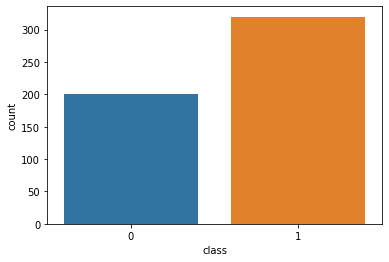

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="class", data=data)

<AxesSubplot:xlabel='gender', ylabel='count'>

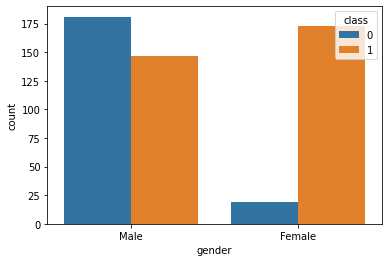

In [143]:
sns.countplot(x="gender", data=data, hue="class")

<AxesSubplot:xlabel='age', ylabel='Count'>

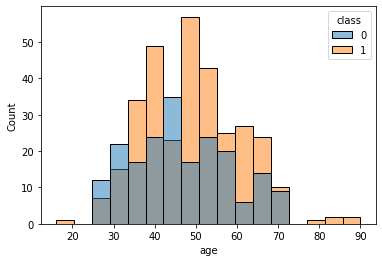

In [144]:
sns.histplot(x="age", hue="class", data=data)

In [145]:
data.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [146]:
data.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
# Age is in different scale
# Regularization using minmaxscaler on age column
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
data["age"] = mms.fit_transform(data["age"].ravel().reshape(-1, 1))
data.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.432822,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,0.164209,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.310811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.425676,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.554054,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 520 non-null    float64
 1   gender              520 non-null    object 
 2   polyuria            520 non-null    int64  
 3   polydipsia          520 non-null    int64  
 4   sudden_weight_loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   polyphagia          520 non-null    int64  
 7   genital_thrush      520 non-null    int64  
 8   visual_blurring     520 non-null    int64  
 9   itching             520 non-null    int64  
 10  irritability        520 non-null    int64  
 11  delayed_healing     520 non-null    int64  
 12  partial_paresis     520 non-null    int64  
 13  muscle_stiffness    520 non-null    int64  
 14  alopecia            520 non-null    int64  
 15  obesity             520 non-null    int64  
 16  class   

In [149]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
data["gender"] = lb.fit_transform(data["gender"].ravel())
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [150]:
data["gender"].describe()

count    520.000000
mean       0.630769
std        0.483061
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: gender, dtype: float64

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 520 non-null    float64
 1   gender              520 non-null    int32  
 2   polyuria            520 non-null    int64  
 3   polydipsia          520 non-null    int64  
 4   sudden_weight_loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   polyphagia          520 non-null    int64  
 7   genital_thrush      520 non-null    int64  
 8   visual_blurring     520 non-null    int64  
 9   itching             520 non-null    int64  
 10  irritability        520 non-null    int64  
 11  delayed_healing     520 non-null    int64  
 12  partial_paresis     520 non-null    int64  
 13  muscle_stiffness    520 non-null    int64  
 14  alopecia            520 non-null    int64  
 15  obesity             520 non-null    int64  
 16  class   

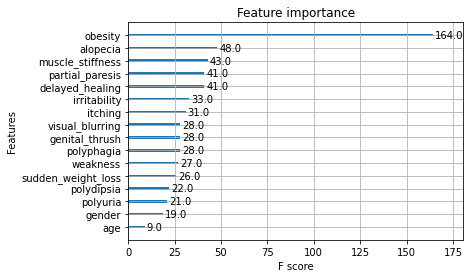

In [152]:
from xgboost import plot_importance, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import warnings

warnings.filterwarnings("ignore")

X = data.drop(columns=["class"])
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train, verbose=False)
plot_importance(xgb).set_yticklabels(columns[:-1])
plt.show()

In [153]:
selection = SelectFromModel(xgb, threshold=0.0012 , prefit=True)
X_train_selected = selection.transform(X_train)
X_test_selected = selection.transform(X_test)

eval_set = [(X_train_selected, y_train), (X_test_selected, y_test)]

selected_model = XGBClassifier(eval_metric=['logloss', 'error', 'auc'])
selected_model.fit(X_train_selected, y_train, eval_set=eval_set, eval_metric=['logloss', 'error', 'auc'])


[0]	validation_0-logloss:0.48669	validation_0-error:0.03846	validation_0-auc:0.98211	validation_1-logloss:0.49531	validation_1-error:0.06731	validation_1-auc:0.98890
[1]	validation_0-logloss:0.37275	validation_0-error:0.04086	validation_0-auc:0.98194	validation_1-logloss:0.38461	validation_1-error:0.06731	validation_1-auc:0.98805
[2]	validation_0-logloss:0.29387	validation_0-error:0.02885	validation_0-auc:0.98937	validation_1-logloss:0.30997	validation_1-error:0.03846	validation_1-auc:0.99296
[3]	validation_0-logloss:0.23999	validation_0-error:0.02885	validation_0-auc:0.99243	validation_1-logloss:0.25412	validation_1-error:0.03846	validation_1-auc:0.99210
[4]	validation_0-logloss:0.20183	validation_0-error:0.02404	validation_0-auc:0.99300	validation_1-logloss:0.22151	validation_1-error:0.03846	validation_1-auc:0.99125
[5]	validation_0-logloss:0.17139	validation_0-error:0.02164	validation_0-auc:0.99505	validation_1-logloss:0.19061	validation_1-error:0.01923	validation_1-auc:0.99168
[6]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric=['logloss', 'error', 'auc'], gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [165]:
result = selected_model.evals_result()
epochs = len(result['validation_0']['logloss'])
x_axis = range(0, epochs)

<AxesSubplot:>

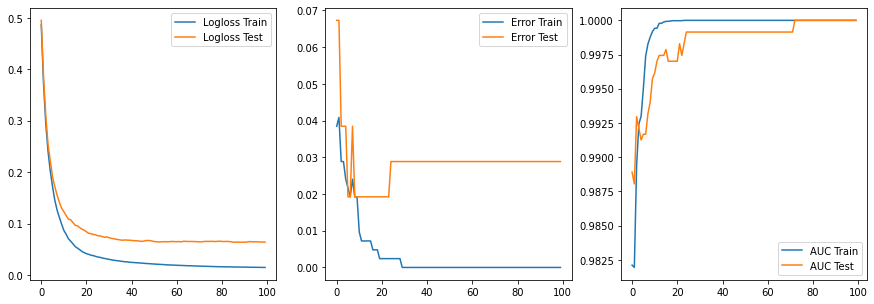

In [178]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
sns.lineplot(x_axis, result['validation_0']['logloss'], label='Logloss Train', ax=ax[0])
sns.lineplot(x_axis, result['validation_1']['logloss'], label='Logloss Test', ax=ax[0])

sns.lineplot(x_axis, result['validation_0']['error'], label='Error Train', ax=ax[1])
sns.lineplot(x_axis, result['validation_1']['error'], label='Error Test', ax=ax[1])

sns.lineplot(x_axis, result['validation_0']['auc'], label='AUC Train', ax=ax[2])
sns.lineplot(x_axis, result['validation_1']['auc'], label='AUC Test', ax=ax[2])


In [179]:
selected_model.score(X_test_selected, y_test)


0.9711538461538461

In [157]:
from sklearn.metrics import classification_report

y_pred = selected_model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104

